In [103]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [104]:
# Step 1: Load and preprocess the data
df = pd.read_csv(r"C:\Users\Asus\Desktop\pi_ebapp\daaaaaata.csv")


In [105]:
df.head()

,Unnamed: 0,date,CODE,Name,open,close,low,high,volume,NB_TRANSACTION,...,exponential_moving_average_26,macd,macd_signal,macd_histogram,rsi,skewness,kurtosis,sharpe_ratio,volatility,liquidity
0,19,2008-01-31,340005,AMEN BANK,27.000000,27.000000,27.000000,27.000000,1851.0,9.0,...,27.124584,0.008677,0.020806,-0.012129,50.000000,1.638286,1.437509,0.012182,0.013587,5395.234422
1,20,2008-02-01,340005,AMEN BANK,27.400000,27.400000,27.400000,27.400000,3.0,1.0,...,27.150043,0.025522,0.014633,0.010889,55.050505,1.638286,1.437509,0.012182,0.013587,5395.234422
2,21,2008-02-04,340005,AMEN BANK,27.366667,27.366667,27.366667,27.366667,0.0,0.0,...,27.169706,0.036024,0.012542,0.023482,48.091603,1.638286,1.437509,0.012182,0.013587,5395.234422
3,22,2008-02-05,340005,AMEN BANK,27.333333,27.333333,27.333333,27.333333,0.0,0.0,...,27.184314,0.041477,0.018403,0.023073,47.637051,1.638286,1.437509,0.012182,0.013587,5395.234422
4,23,2008-02-06,340005,AMEN BANK,27.300000,27.300000,27.300000,27.300000,51.0,2.0,...,27.194488,0.042931,0.025732,0.017199,47.191011,1.638286,1.437509,0.012182,0.013587,5395.234422


In [106]:
df["date"] = pd.to_datetime(df["date"])

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29656 entries, 0 to 29655
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Unnamed: 0                     29656 non-null  int64         
 1   date                           29656 non-null  datetime64[ns]
 2   CODE                           29656 non-null  object        
 3   Name                           29656 non-null  object        
 4   open                           29656 non-null  float64       
 5   close                          29656 non-null  float64       
 6   low                            29656 non-null  float64       
 7   high                           29656 non-null  float64       
 8   volume                         29656 non-null  float64       
 9   NB_TRANSACTION                 29656 non-null  float64       
 10  CAPITAUX IND_RES               29656 non-null  float64       
 11  price_change   

In [108]:
selected_features = ['Name','open', 'close', 'low', 'high', 'volume', 'NB_TRANSACTION',
                     'moving_average_5', 'moving_average_10', 'moving_average_20',
                     'macd', 'rsi', 'volatility', 'liquidity','date']

In [109]:
# Extract the selected features
selected_df = df[selected_features]



In [110]:
unique_values = df['Name'].unique()

# Print the unique values
print(unique_values)

['AMEN BANK' 'ATL' 'ATTIJARI LEASING' 'BIAT' 'BNA' 'BT' 'CITY CARS'
 'ENNAKL AUTOMOBILES' 'MAGASIN GENERAL']


In [111]:
for name in unique_values:
    globals()['data_' + name.replace(' ', '_')] = selected_df[selected_df['Name'] == name]

In [112]:
data_AMEN_BANK

,Name,open,close,low,high,volume,NB_TRANSACTION,moving_average_5,moving_average_10,moving_average_20,macd,rsi,volatility,liquidity,date
0,AMEN BANK,27.000000,27.000000,27.000000,27.000000,1851.0,9.0,27.245000,27.128500,27.097250,0.008677,50.000000,0.013587,5395.234422,2008-01-31
1,AMEN BANK,27.400000,27.400000,27.400000,27.400000,3.0,1.0,27.227000,27.118500,27.127750,0.025522,55.050505,0.013587,5395.234422,2008-02-01
2,AMEN BANK,27.366667,27.366667,27.366667,27.366667,0.0,0.0,27.226833,27.105167,27.156583,0.036024,48.091603,0.013587,5395.234422,2008-02-04
3,AMEN BANK,27.333333,27.333333,27.333333,27.333333,0.0,0.0,27.244500,27.138500,27.183750,0.041477,47.637051,0.013587,5395.234422,2008-02-05
4,AMEN BANK,27.300000,27.300000,27.300000,27.300000,51.0,2.0,27.280000,27.247500,27.209250,0.042931,47.191011,0.013587,5395.234422,2008-02-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3828,AMEN BANK,33.300000,33.280000,33.280000,33.280000,25119.0,114.0,33.396000,33.063000,32.699000,-0.021014,60.679612,0.013587,5395.234422,2023-12-25
3829,AMEN BANK,33.280000,33.300000,33.300000,33.300000,167139.0,136.0,33.336000,33.248000,32.729000,-0.002607,60.869565,0.013587,5395.234422,2023-12-26
3830,AMEN BANK,33.300000,33.500000,33.500000,33.500000,5995.0,85.0,33.356000,33.458000,32.769000,0.027798,69.035533,0.013587,5395.234422,2023-12-27
3831,AMEN BANK,33.500000,34.000000,34.000000,34.000000,31488.0,53.0,33.476000,33.558000,32.834000,0.091189,75.058275,0.013587,5395.234422,2023-12-28


In [113]:
data_ATL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3874 entries, 3833 to 7706
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Name               3874 non-null   object        
 1   open               3874 non-null   float64       
 2   close              3874 non-null   float64       
 3   low                3874 non-null   float64       
 4   high               3874 non-null   float64       
 5   volume             3874 non-null   float64       
 6   NB_TRANSACTION     3874 non-null   float64       
 7   moving_average_5   3874 non-null   float64       
 8   moving_average_10  3874 non-null   float64       
 9   moving_average_20  3874 non-null   float64       
 10  macd               3874 non-null   float64       
 11  rsi                3874 non-null   float64       
 12  volatility         3874 non-null   float64       
 13  liquidity          3874 non-null   float64       
 14  date      

In [114]:
# Drop columns from each DataFrame 
for name in unique_values:
    globals()['data_' + name.replace(' ', '_')] = globals()['data_' + name.replace(' ', '_')].drop(columns=["Name"])

In [115]:
data_ATL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3874 entries, 3833 to 7706
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   open               3874 non-null   float64       
 1   close              3874 non-null   float64       
 2   low                3874 non-null   float64       
 3   high               3874 non-null   float64       
 4   volume             3874 non-null   float64       
 5   NB_TRANSACTION     3874 non-null   float64       
 6   moving_average_5   3874 non-null   float64       
 7   moving_average_10  3874 non-null   float64       
 8   moving_average_20  3874 non-null   float64       
 9   macd               3874 non-null   float64       
 10  rsi                3874 non-null   float64       
 11  volatility         3874 non-null   float64       
 12  liquidity          3874 non-null   float64       
 13  date               3874 non-null   datetime64[ns]
dtypes: datetim

In [116]:
for name in unique_values:
    df_name = 'data_' + name.replace(' ', '_')
    if df_name in globals():
        globals()[df_name] = globals()[df_name].set_index("date")
    else:
        print(f"DataFrame {df_name} not found in globals().")


In [117]:
data_ATL

,open,close,low,high,volume,NB_TRANSACTION,moving_average_5,moving_average_10,moving_average_20,macd,rsi,volatility,liquidity
date,,,,,,,,,,,,,
2008-01-02,3.40,3.42,3.42,3.42,37695.0,39.0,27.544,30.470,31.4325,-2.293907,9.341456,0.02025,11149.491911
2008-01-03,3.42,3.42,3.42,3.42,17120.0,30.0,21.568,27.452,29.9835,-4.143278,9.355026,0.02025,11149.491911
2008-01-04,3.42,3.48,3.48,3.48,7420.0,16.0,15.564,24.460,28.5375,-5.540211,5.109489,0.02025,11149.491911
2008-01-07,3.48,3.49,3.49,3.49,6385.0,18.0,9.462,21.469,27.1120,-6.570741,2.469522,0.02025,11149.491911
2008-01-10,3.48,3.48,3.48,3.48,8581.0,21.0,3.458,18.487,25.6935,-7.304054,2.468750,0.02025,11149.491911
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25,3.60,3.60,3.60,3.60,3757.0,10.0,3.604,3.611,3.6090,-0.015034,52.173913,0.02025,11149.491911
2023-12-26,3.60,3.60,3.60,3.60,5351.0,16.0,3.604,3.606,3.6075,-0.014640,45.000000,0.02025,11149.491911
2023-12-27,3.60,3.60,3.60,3.60,7307.0,17.0,3.600,3.606,3.6055,-0.014165,51.428571,0.02025,11149.491911


In [118]:
# from sklearn.preprocessing import MinMaxScaler

# # Initialize MinMaxScaler
# scaler = MinMaxScaler()

# for name in unique_values:
#     df_name = 'data_' + name.replace(' ', '_')
#     if df_name in globals():
      
#         # Fit scaler on the data and transform it
#         scaled_features = scaler.fit_transform(globals()[df_name])
        
#         # Convert the scaled features back to a DataFrame
#         globals()['scaled_' + df_name] = pd.DataFrame(scaled_features, columns=globals()[df_name].columns)
#     else:
#         print(f"DataFrame {df_name} not found in globals().")

# # Now we have scaled versions of each DataFrame in the format scaled_data_X
# # For example, scaled_data_ATL, scaled_data_BIAT, etc.


In [119]:
data_MAGASIN_GENERAL

,open,close,low,high,volume,NB_TRANSACTION,moving_average_5,moving_average_10,moving_average_20,macd,rsi,volatility,liquidity
date,,,,,,,,,,,,,
2008-01-02,28.28000,27.640000,27.640000,27.640000,605.0,7.0,15.384000,13.675000,12.591500,1.497247,99.939394,0.027506,1206.868936
2008-01-03,27.64000,28.260000,28.260000,28.260000,1773.0,16.0,18.636000,15.310000,13.412000,2.489535,99.941280,0.027506,1206.868936
2008-01-04,28.30000,28.300000,28.300000,28.300000,945.0,14.0,21.840000,16.944000,14.234500,3.241789,99.941418,0.027506,1206.868936
2008-01-07,28.30000,28.500000,28.500000,28.500000,449.0,11.0,25.040000,18.598000,15.067000,3.810173,100.000000,0.027506,1206.868936
2008-01-10,28.30000,29.000000,29.000000,29.000000,1530.0,21.0,28.340000,20.298000,15.932000,4.251952,100.000000,0.027506,1206.868936
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-23,27.27232,30.000000,30.000000,30.000000,0.0,0.0,30.000000,30.050000,30.492647,-0.192670,0.000000,0.027506,1206.868936
2015-06-24,27.23360,30.000000,30.000000,30.000000,0.0,0.0,30.000000,30.016667,30.433824,-0.193915,0.000000,0.027506,1206.868936
2015-06-25,27.19488,30.000000,30.000000,30.000000,100.0,2.0,30.000000,30.000000,30.377941,-0.192680,0.000000,0.027506,1206.868936


In [120]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Define the test size
test_size = 0.2  # Adjust as needed
scaler = MinMaxScaler()

for name in unique_values:
    df_name = 'data_' + name.replace(' ', '_')
    if df_name in globals():
        
        # Ensure there is data available for testing (from 2020 onwards)
        if (globals()[df_name].index.year >= 2020).any():
        
            # Extract data up to the end of 2019 for training
            train_data = globals()[df_name].loc[globals()[df_name].index.year <= 2019]

            # Extract data from 2020 onwards for testing
            test_data = globals()[df_name].loc[globals()[df_name].index.year >= 2020]

            # Scale the features in the train set
            scaled_train_features = scaler.fit_transform(train_data)
            scaled_train_df = pd.DataFrame(scaled_train_features, columns=train_data.columns, index=train_data.index)

            # Scale the features in the test set using the scaler fitted on the train set
            scaled_test_features = scaler.transform(test_data)
            scaled_test_df = pd.DataFrame(scaled_test_features, columns=test_data.columns, index=test_data.index)

            # Store the scaled train and test sets in new DataFrames with prefixes "scaled_train_" and "scaled_test_"
            globals()['scaled_train_' + df_name] = scaled_train_df
            globals()['scaled_test_' + df_name] = scaled_test_df
        else:
            print(f"No testing data available for {name}. Dropping this company's data.")
            # Drop the company's data from further processing
            globals().pop(df_name)
    else:
        print(f"DataFrame {df_name} not found in globals().")


No testing data available for MAGASIN GENERAL. Dropping this company's data.


In [121]:
from sklearn.metrics import mean_squared_error

Training model for AMEN BANK


C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


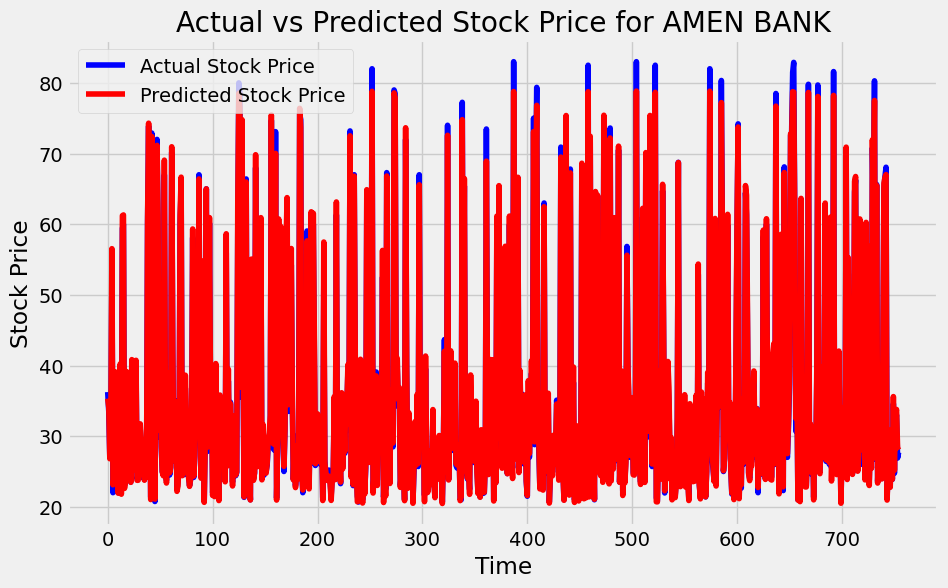

RMSE for AMEN BANK: 1.1834597152401771
Model trained for AMEN BANK.
Training model for ATL


C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


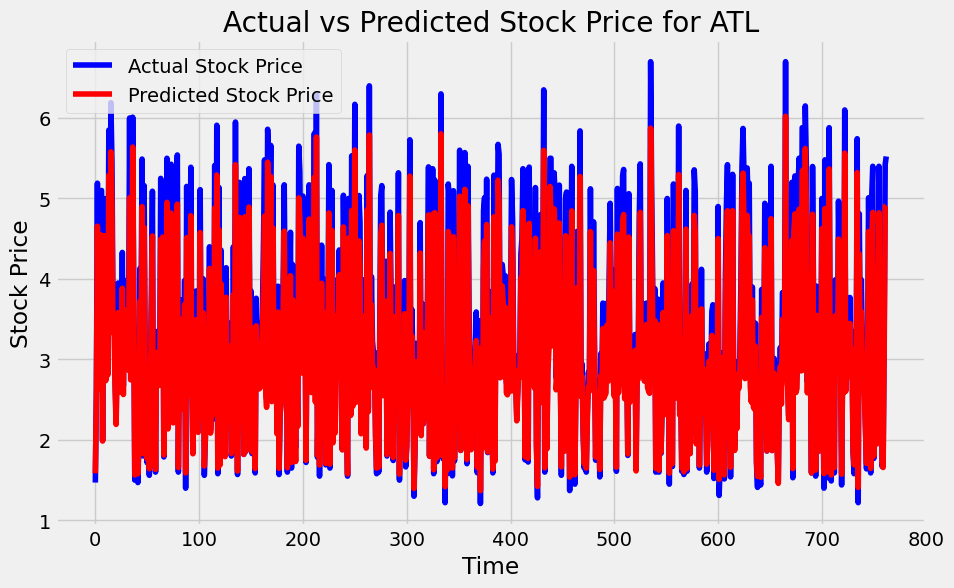

RMSE for ATL: 0.3088090565463057
Model trained for ATL.
Training model for ATTIJARI LEASING


C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


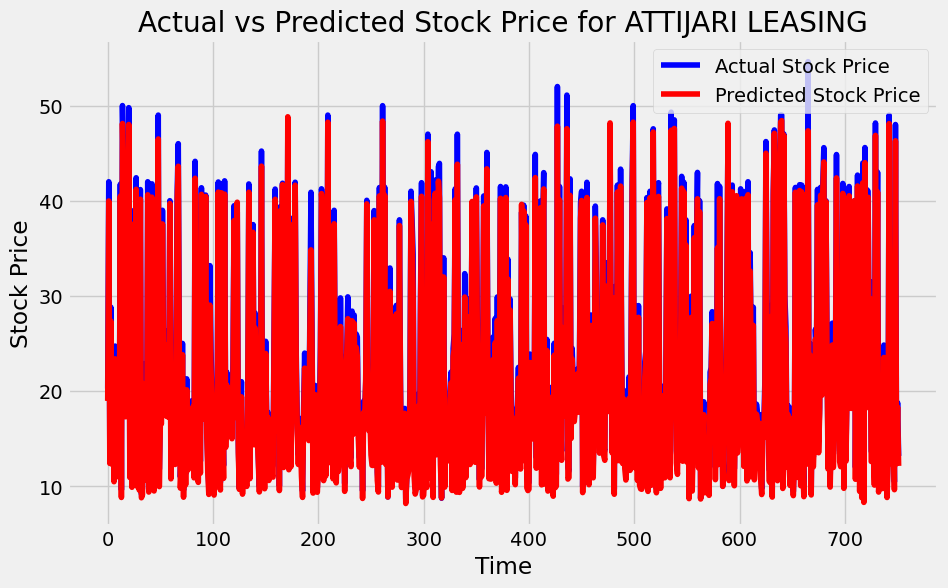

RMSE for ATTIJARI LEASING: 1.372764602031395
Model trained for ATTIJARI LEASING.
Training model for BIAT


C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


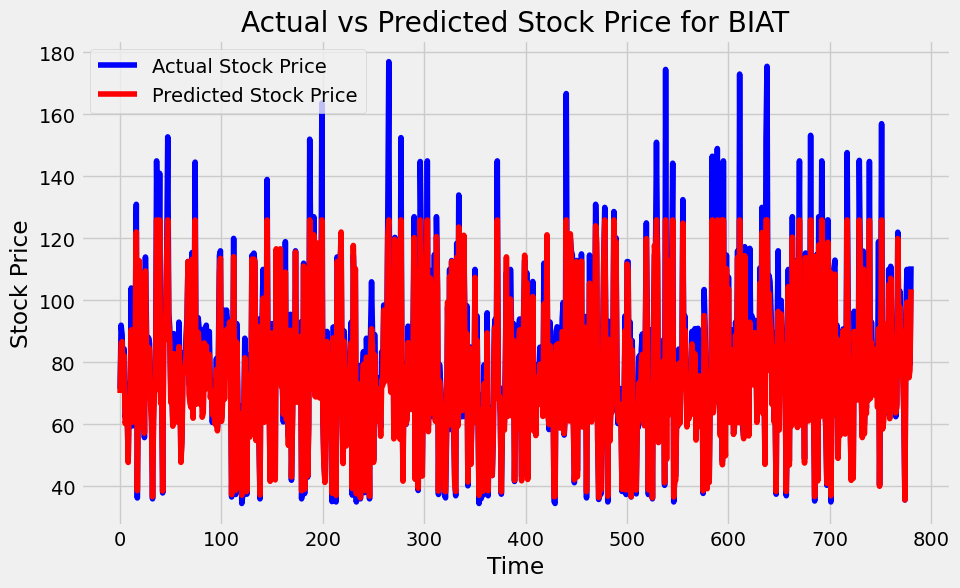

RMSE for BIAT: 7.275222607792635
Model trained for BIAT.
Training model for BNA


C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


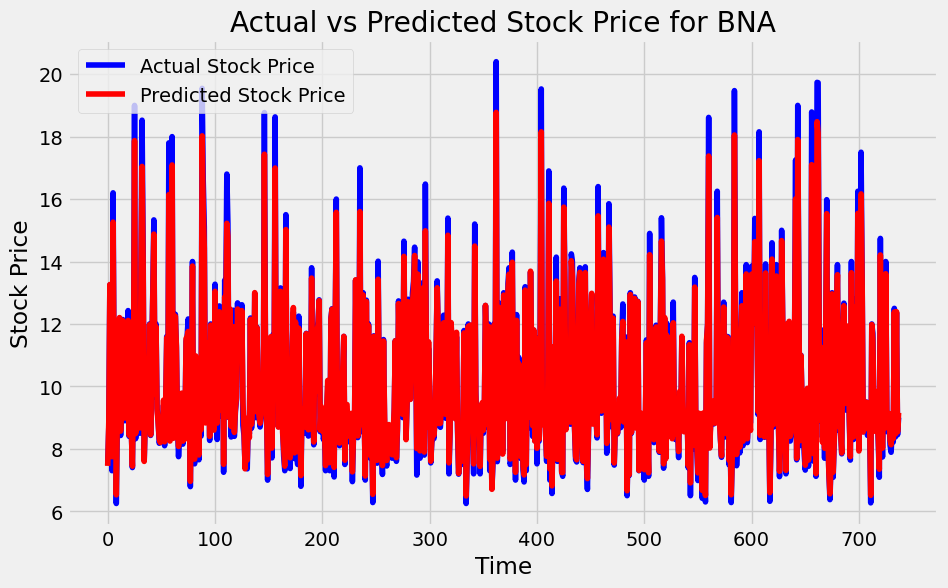

RMSE for BNA: 0.325462793620469
Model trained for BNA.
Training model for BT


C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


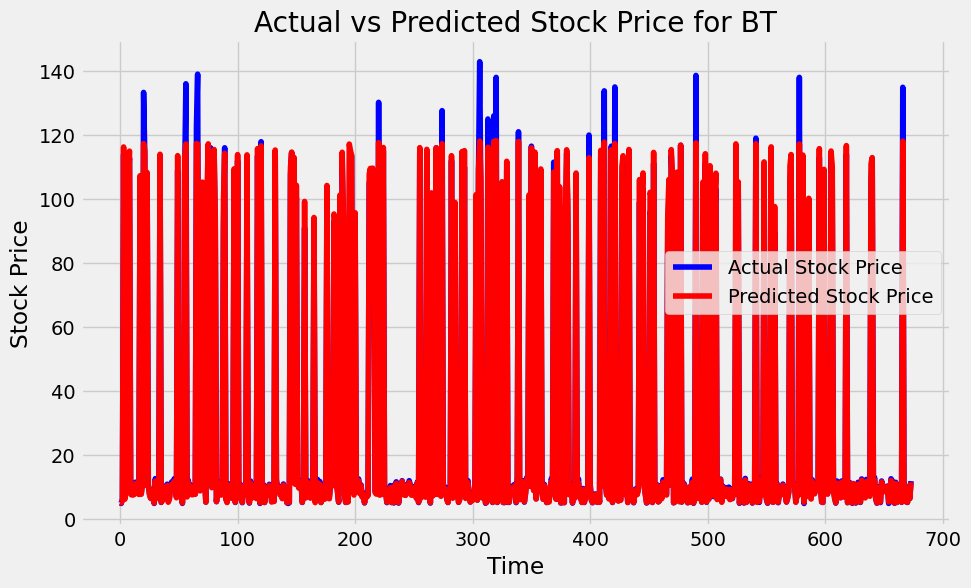

RMSE for BT: 3.504977884387777
Model trained for BT.
Training model for CITY CARS


C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


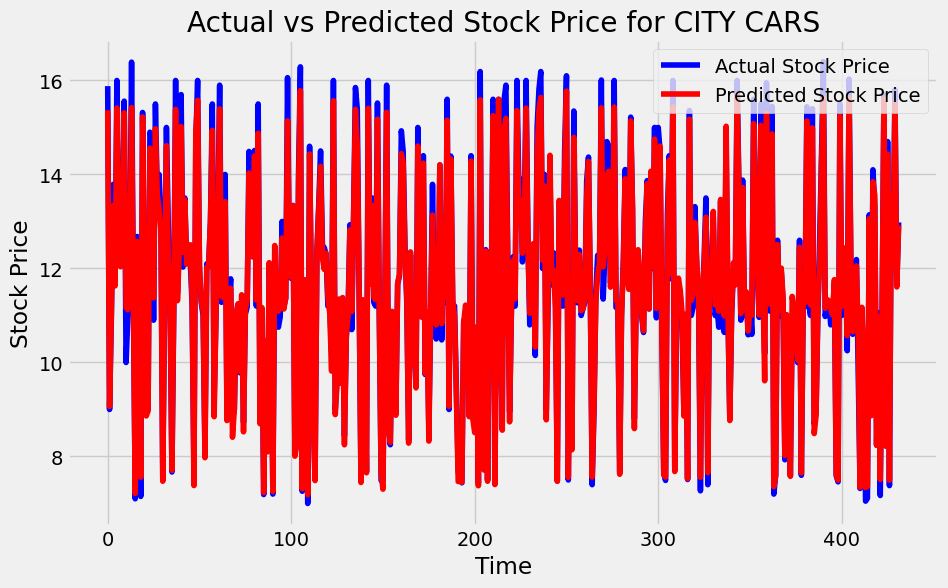

RMSE for CITY CARS: 0.28219371901949175
Model trained for CITY CARS.
Training model for ENNAKL AUTOMOBILES


C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


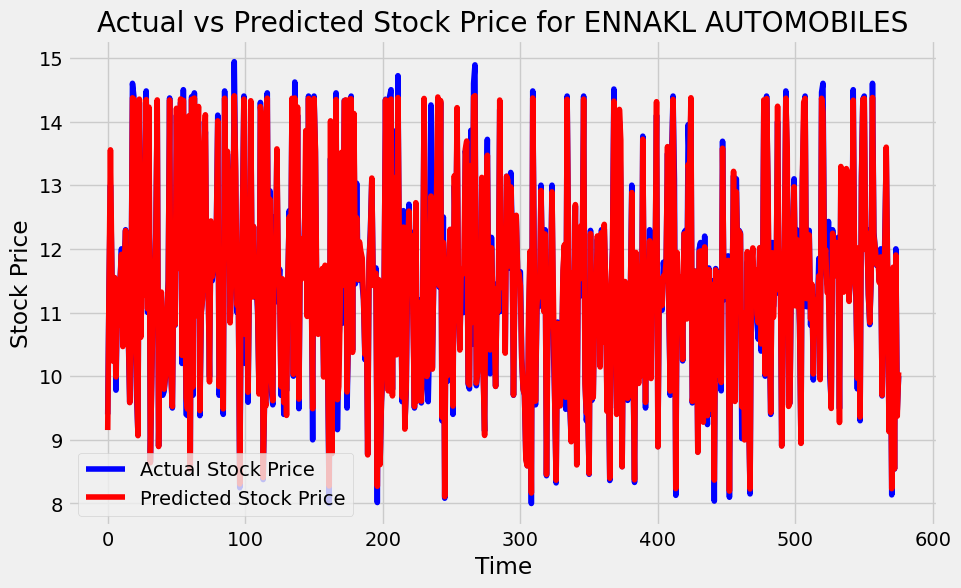

RMSE for ENNAKL AUTOMOBILES: 0.1980466215960722
Model trained for ENNAKL AUTOMOBILES.
Training model for MAGASIN GENERAL
DataFrame data_MAGASIN_GENERAL not found in globals().
All models trained successfully.


In [123]:
# Initialize a dictionary to store trained models
trained_models = {}

# Function to train LSTM model for a single company
def train_model_for_company(name):
    print(f"Training model for {name}")
    df_name = 'data_' + name.replace(' ', '_')
    if df_name in globals():
        # Extract features and target
        features = globals()[df_name].values
        target = globals()[df_name]['close'].values
        
        # Scale the features
        scaler = MinMaxScaler()
        scaled_features = scaler.fit_transform(features)
        
        # Reshape the data for LSTM input
        X = []
        y = []
        for i in range(len(scaled_features) - 60):
            X.append(scaled_features[i:i+60])
            y.append(target[i+60])
        X, y = np.array(X), np.array(y)
        
        # Split the data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Initialize the LSTM model
        regressor = Sequential()

        # First LSTM layer with Dropout regularization
        regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
        regressor.add(Dropout(0.2))

        # Second LSTM layer
        regressor.add(LSTM(units=50, return_sequences=True))
        regressor.add(Dropout(0.2))

        # Third LSTM layer
        regressor.add(LSTM(units=50, return_sequences=True))
        regressor.add(Dropout(0.2))

        # Fourth LSTM layer
        regressor.add(LSTM(units=50))
        regressor.add(Dropout(0.2))

        # Output layer
        regressor.add(Dense(units=1))

        # Compile the RNN
        regressor.compile(optimizer='rmsprop', loss='mean_squared_error')

        # Fit the model to the training data
        regressor.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)  # verbose=0 for no progress bar
        
        # Make predictions on the test data
        y_pred = regressor.predict(X_test)

        # Plot the predicted and original data
        plot_predictions(y_test, y_pred, name)

        # Evaluate the model
        rmse = return_rmse(y_test, y_pred)
        print(f"RMSE for {name}: {rmse}")

        # Store the trained model in the dictionary
        trained_models[name] = regressor

        print(f"Model trained for {name}.")
    else:
        print(f"DataFrame {df_name} not found in globals().")

# Function to plot predictions
def plot_predictions(test_set, predicted_stock_price, company_name):
    plt.figure(figsize=(10, 6))
    plt.plot(test_set, color='blue', label='Actual Stock Price')
    plt.plot(predicted_stock_price, color='red', label='Predicted Stock Price')
    plt.title(f"Actual vs Predicted Stock Price for {company_name}")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.show()

# Function to calculate RMSE
def return_rmse(test_set, predicted_stock_price):
    rmse = np.sqrt(mean_squared_error(test_set, predicted_stock_price))
    return rmse

# Loop over each company name and train the model sequentially
for name in unique_values:
    train_model_for_company(name)

print("All models trained successfully.")

Training GRU model for AMEN BANK


C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\keras\src\optimizers\base_optimizer.py:32: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


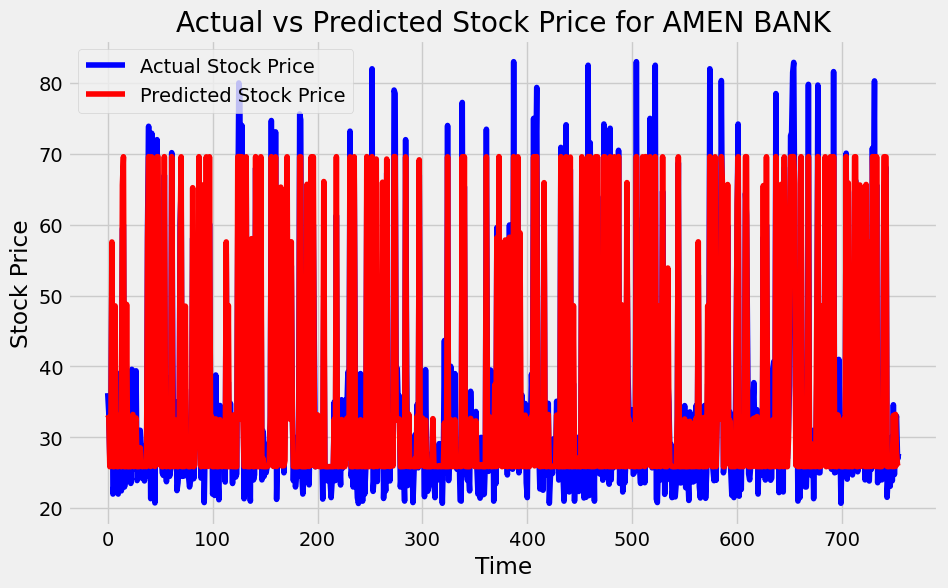

RMSE for AMEN BANK: 4.6143101069885475


NameError: name 'trained_gru_models' is not defined

In [128]:
# Initialize a dictionary to store RMSE values
gru_rmse_values = {}

# Function to train GRU model for a single company
def train_gru_model_for_company(name):
    print(f"Training GRU model for {name}")
    df_name = 'data_' + name.replace(' ', '_')
    if df_name in globals():
        # Extract features and target
        features = globals()[df_name].values
        target = globals()[df_name]['close'].values
        
        # Scale the features
        scaler = MinMaxScaler()
        scaled_features = scaler.fit_transform(features)
        
        # Reshape the data for GRU input
        X = []
        y = []
        for i in range(len(scaled_features) - 60):
            X.append(scaled_features[i:i+60])
            y.append(target[i+60])
        X, y = np.array(X), np.array(y)
        
        # Split the data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Initialize the GRU model
        regressor = Sequential()

        # First GRU layer with Dropout regularization
        regressor.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), activation='tanh'))
        regressor.add(Dropout(0.2))

        # Second GRU layer
        regressor.add(GRU(units=50, return_sequences=True, activation='tanh'))
        regressor.add(Dropout(0.2))

        # Third GRU layer
        regressor.add(GRU(units=50, return_sequences=True, activation='tanh'))
        regressor.add(Dropout(0.2))

        # Fourth GRU layer
        regressor.add(GRU(units=50, activation='tanh'))
        regressor.add(Dropout(0.2))

        # Output layer
        regressor.add(Dense(units=1))

        # Compile the RNN
        regressor.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False), loss='mean_squared_error')

        # Fit the model to the training data
        regressor.fit(X_train, y_train, epochs=50, batch_size=150, verbose=0)  # verbose=0 for no progress bar
        
        # Make predictions on the test data
        y_pred = regressor.predict(X_test)

        # Plot the predicted and actual data
        plot_predictions(y_test, y_pred, name)

        # Calculate RMSE
        rmse = return_rmse(y_test, y_pred)
        print(f"RMSE for {name}: {rmse}")
        gru_rmse_values[name] = rmse

        # Store the trained model in the dictionary
        trained_gru_models[name] = regressor

        print(f"GRU model trained for {name}.")
    else:
        print(f"DataFrame {df_name} not found in globals().")

# Function to plot predictions
def plot_predictions(test_set, predicted_stock_price, company_name):
    plt.figure(figsize=(10, 6))
    plt.plot(test_set, color='blue', label='Actual Stock Price')
    plt.plot(predicted_stock_price, color='red', label='Predicted Stock Price')
    plt.title(f"Actual vs Predicted Stock Price for {company_name}")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.show()

# Function to calculate RMSE
def return_rmse(test_set, predicted_stock_price):
    rmse = np.sqrt(mean_squared_error(test_set, predicted_stock_price))
    return rmse

# Loop over each company name and train the GRU model sequentially
for name in unique_values:
    train_gru_model_for_company(name)

print("All GRU models trained successfully.")

# Display RMSE for each company
print("\nRMSE values:")
for name, rmse in gru_rmse_values.items():
    print(f"{name}: {rmse}")